<a href="https://colab.research.google.com/github/RandiBro234/Ensemble-Learning/blob/main/Ensemble_Learning_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAD DATASET DAN LIBRARY**

In [1]:
# === 1. Import Library ===
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc
)

# **LOAD DATASET**

In [2]:
# === 2. Upload Dataset ===
print("Silakan upload file Iris.csv Anda")
uploaded = files.upload()

# Membaca file yang diupload
for fn in uploaded.keys():
    print(f"\nFile '{fn}' berhasil di-upload!")
    df = pd.read_csv(fn)

Silakan upload file Iris.csv Anda


Saving Iris.csv to Iris.csv

File 'Iris.csv' berhasil di-upload!


# **EDA**

In [3]:
# === 3. Eksplorasi Data ===
print("\n===== Informasi Data =====")
print(df.head(150))


===== Informasi Data =====
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  

In [4]:
print("\n===== Informasi Dataset =====")
print(df.info())


===== Informasi Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


/tmp/ipython-input-1591976568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=df, palette='viridis')


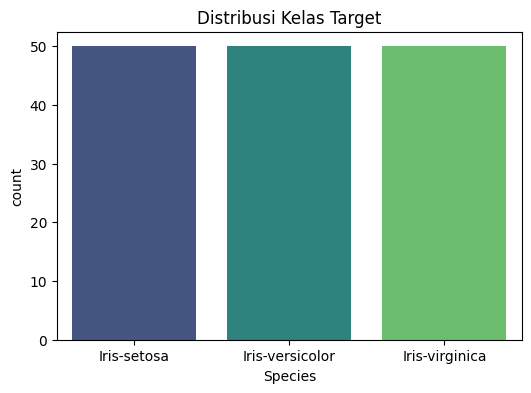

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=df, palette='viridis')
plt.title('Distribusi Kelas Target')
plt.show()

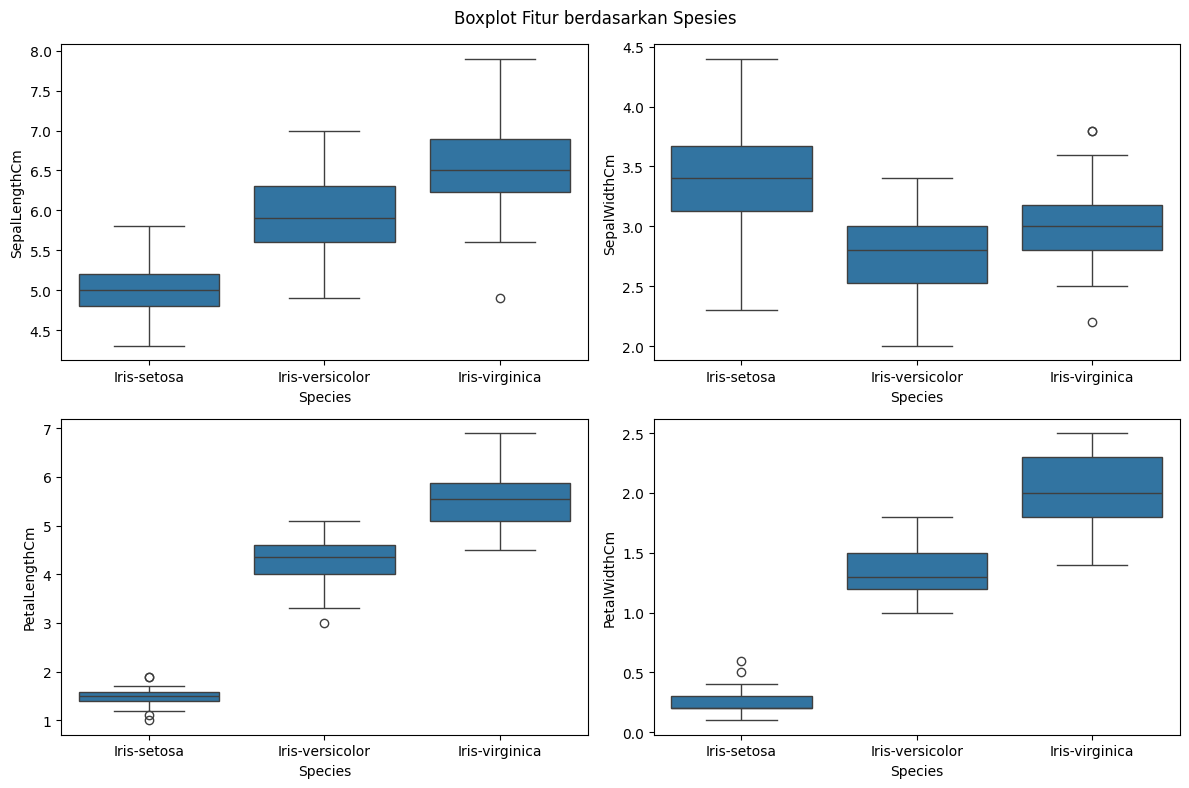

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.boxplot(x='Species', y='SepalLengthCm', data=df, ax=axes[0,0])
sns.boxplot(x='Species', y='SepalWidthCm', data=df, ax=axes[0,1])
sns.boxplot(x='Species', y='PetalLengthCm', data=df, ax=axes[1,0])
sns.boxplot(x='Species', y='PetalWidthCm', data=df, ax=axes[1,1])
fig.suptitle('Boxplot Fitur berdasarkan Spesies')
plt.tight_layout()
plt.show()

# **PREPROCESSING DATA**

In [7]:
X = df.drop(columns=["Id", "Species"])
y = LabelEncoder().fit_transform(df["Species"])  # ubah target ke bentuk numerik

print("\nFitur (X) setelah preprocessing:")
print(X.head())

print("\nTarget (y) setelah label encoding:")
print(y[:10])

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tampilkan bentuk data
print("\nUkuran data:")
print(f"X_train: {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test : {y_test.shape}")

# Tampilkan contoh isi data training & testing
print("\nContoh 5 baris data training:")
print(X_train.head())

print("\nContoh label training:")
print(y_train[:10])



Fitur (X) setelah preprocessing:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

Target (y) setelah label encoding:
[0 0 0 0 0 0 0 0 0 0]

Ukuran data:
X_train: (120, 4)
X_test : (30, 4)
y_train: (120,)
y_test : (30,)

Contoh 5 baris data training:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
8              4.4           2.9            1.4           0.2
106            4.9           2.5            4.5           1.7
76             6.8           2.8            4.8           1.4
9              4.9           3.1            1.5           0.1
89             5.5           2.5            4.0           1.3

Contoh label training:
[0 2 1 0 1 2 1 2 2 2]


# **INISIALISASI MODEL**

In [8]:
# === 6. Inisialisasi Model ===
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42)
}

# **TRAINIMG DAN EVALUASI MODEL**


Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



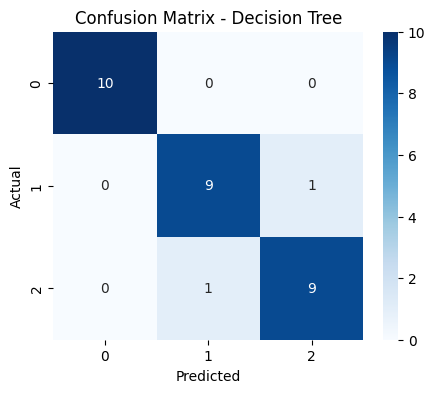


Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



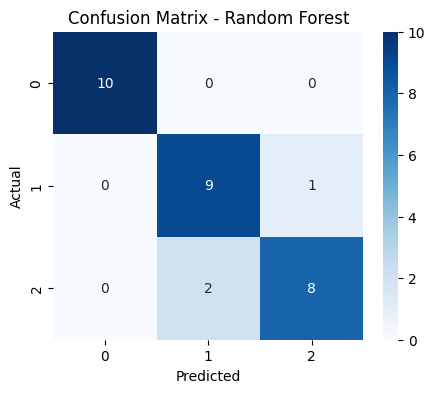


Model: Extra Trees
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



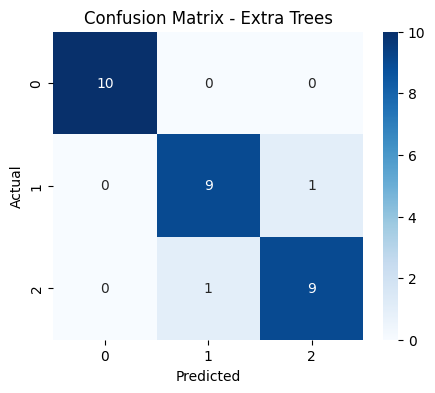

In [9]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n===============================")
    print(f"Model: {name}")
    print("===============================")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Decision Tree adalah model dasar (bukan bagging). Ia belajar dari keseluruhan data tanpa ensemble, performanya bagus tapi tidak se-stabil model bagging.

Random Forest → memilih fitur secara acak saat split.

Extra Trees → selain fitur acak, juga memilih titik split secara acak.

Dari hasil:

Semua model berperforma sangat baik (akurasi > 0.9).

Extra Trees dan Decision Tree sedikit unggul di dataset kecil ini dengan akurasi 93%

Random Forest tetap bagus dan lebih stabil jika dataset lebih besar atau kompleks.

# **ROC CURVE**

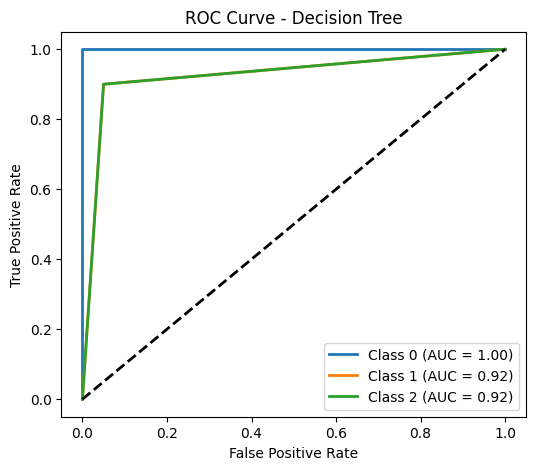

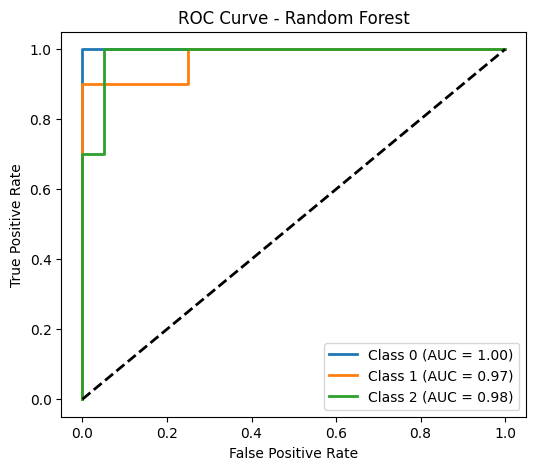

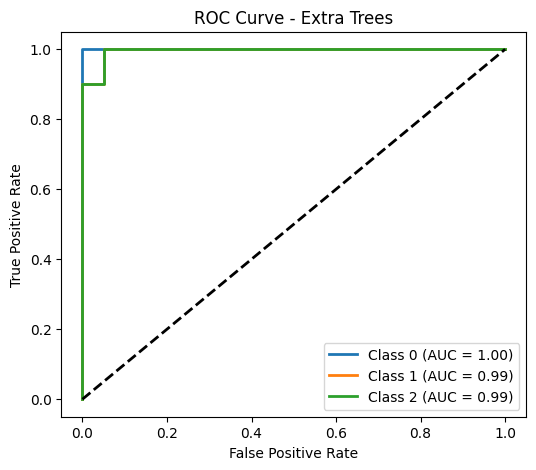

In [10]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(3):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=(6, 5))
        for i in range(3):
            plt.plot(fpr[i], tpr[i], lw=2,
                     label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.title(f'ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

Decision Tree →
Base model, performa cukup baik tapi kurang stabil antar kelas. Mudah overfit jika dataset kompleks.

Random Forest (Bagging) →
Menghasilkan ROC/AUC yang lebih seimbang dan kuat karena menggunakan banyak pohon dari subset data acak.

Extra Trees (Bagging) →
Versi lebih acak dari Random Forest. Menunjukkan AUC tertinggi dan kurva ROC paling sempurna → model paling optimal dan generalisasi terbaik.

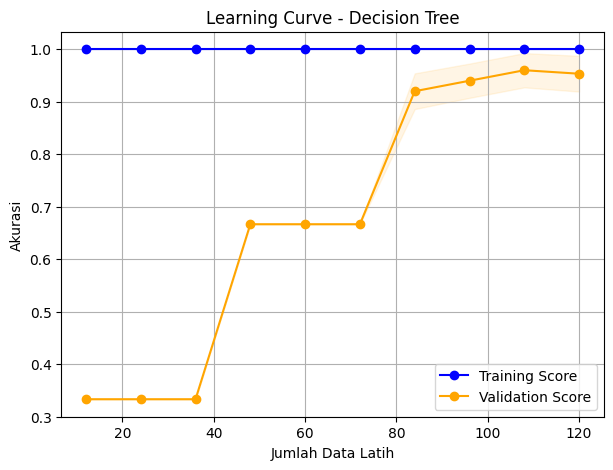

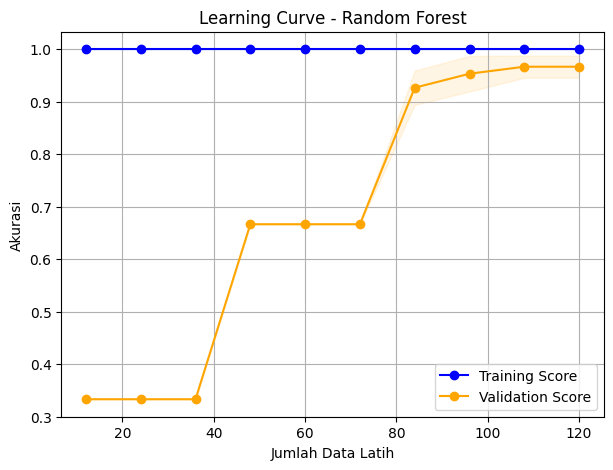

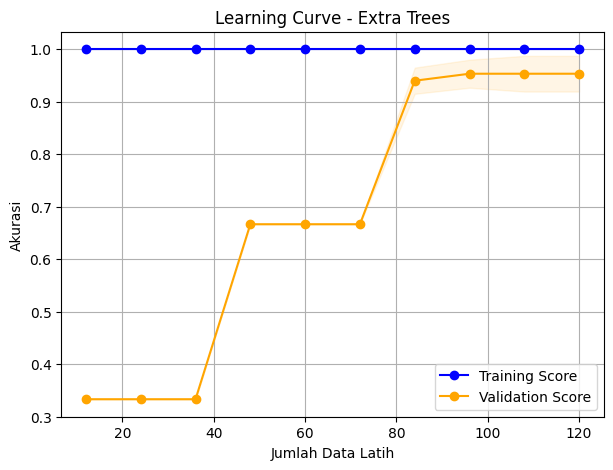

In [11]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(model, X, y, title):
    """Fungsi untuk menggambar learning curve"""
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        cv=5,                # 5-fold cross validation
        n_jobs=-1,           # gunakan semua core CPU
        train_sizes=np.linspace(0.1, 1.0, 10),  # dari 10% hingga 100% data
        scoring='accuracy'
    )

    # Rata-rata dan standar deviasi
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot
    plt.figure(figsize=(7,5))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation Score')

    # Area error (± standar deviasi)
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')

    plt.title(f'Learning Curve - {title}')
    plt.xlabel('Jumlah Data Latih')
    plt.ylabel('Akurasi')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# 🔹 Panggil untuk setiap model
for name, model in models.items():
    plot_learning_curve(model, X, y, title=name)


Dengan demikian, dapat disimpulkan bahwa metode bagging (Random Forest dan Extra Trees) memberikan peningkatan signifikan dalam hal stabilitas dan generalisasi model, dengan Extra Trees menjadi model paling optimal untuk dataset Iris.